# Guided Project: Clean & Analyze Exit Survey 

## Intro:

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 

The original TAFE exit survey data is no longer available.

## Goals:

In this analysis, we have been asked by stakeholders to answer to two key questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
    - About half of all established employees who resigned, were dissatisffied with their jobs. At a high level, individuals who are employed longer are resigning more due to dissatisfaction. Younger employees who resign are less likely to be dissatisfied.

## Context:

We want to use both surveys (DETE & TAFE institute) to answer these questions. However, although both institutions used the same survey template, on of them customizes some of the answers. We will work through this to accomplish our analysis goals.

### Data Dictionary:

#### DETE Survey:
`ID`: An id used to identify the participant of the survey

`SeparationType`: The reason why the person's employment ended

`Cease Date`: The year or month the person's employment ended

`DETE Start Date`: The year the person began employment with the DETE

#### TAFE Survey:
`Record ID`: An id used to identify the participant of the survey

`Reason for ceasing employment`: The reason why the person's employment ended

`LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in ye

In [1]:
#Import Necessary Packages 
import pandas as pd
import numpy as np

In [2]:
#Read employee survey datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
#Lets take an initial look at our datasets:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
# tafe_survey.info()

## Data Observations:
1. Both datasets contain many miscellanous columns that will need to evaluated for their necessity or removed.
2. Column names for the tafe_survey should shortened.
3. Both datasets contain a number of empty data, we will have to evaluate whether or not that data should be removed of replaced.
4. Each dataframe contains many of the same columns, but the column names are different.
5. There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.
6. The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
 

## Phase 1: Filtering Data For Resigned 

In [7]:
#Lets read the data again and interpret 'Not Stated' values as NaN.
#Drop columns we dont need

dete_survey = pd.read_csv('dete_survey.csv',na_values=['Not Stated'])
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)

tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Based on oberservations 1,4,6, we needed to do some initial cleaning on the data, and the code above helps correct these observations.

In [8]:
#Renaming dete survey columns
dete_survey_updated.columns =dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [9]:
#Renaming tafe_survey columns
#dict to rename
tafesurveycolumnrename = {'Record ID':'id','CESSATION YEAR':'cease_date',
                'Reason for ceasing employment':'separationtype',
               'Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age',
               'Employment Type. Employment Type':'employment_status',
                'Classification. Classification':'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=tafesurveycolumnrename)

Based on observations 2,4,5 we chose to make more data cleaning changes.

In [10]:
#Observing unique values for seperation type in both datasets 
print('DETE Survey Unique values listed in the separation column:\n')
print(dete_survey_updated['separationtype'].value_counts())
print('\n------------------------------------------------------------\n')
print('\n------------------------------------------------------------\n')
print('TAFE Survey Unique values listed in the separation column:\n')
print(tafe_survey_updated['separationtype'].value_counts())

DETE Survey Unique values listed in the separation column:

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

------------------------------------------------------------


------------------------------------------------------------

TAFE Survey Unique values listed in the separation column:

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [11]:
#regex pattern to capture the strings we want in the DETE dataset

pattern = r"(Resignation)-[A-Z]{1}[a-z]{3,}\s[a-z]{7,}|/[a-z]{9,}"

# filtering data for only survey takers who resgined, as that is the key
# question we want to answer
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains(pattern)].copy()
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype']=='Resignation'].copy()

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### Workflow:
Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Hence, filtering the data for respondents who only resigned is the most logical sequence of events to answer the question at hand.

# Phase 2: Verifying Data Validity

In [12]:
#using regex to extract year value in cease_date and convert to float
year_regexpattern = r'([0-9]{4})'
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_regexpattern).astype(float)

In [13]:
#checking to see if the years in cease_date and dete_start_date make sense in the DETE dataset
print('DETE Survey Cease Date Unique values:\n')
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=False))
print('\n------------------------------------------------------------\n')
print('\n------------------------------------------------------------\n')
print('DETE Survey Start Date Unique values:\n')
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))

DETE Survey Cease Date Unique values:

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

------------------------------------------------------------


------------------------------------------------------------

DETE Survey Start Date Unique values:

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [14]:
#checking to see if the years in cease_date and dete_resignations make sense in the TAFE dataset
print('TAFE Survey Cease Date Unique values:\n')
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))
print('\n------------------------------------------------------------\n')

TAFE Survey Cease Date Unique values:

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

------------------------------------------------------------



#### Workflow:
For the DETE dataset the most recent cease date year is 2014, this date is not after the current year so it works. Cross referencing the start date for DETE survey, note that values are not equal or greater than the cease date, which makes sense. We can't start before we finish so values here are ok. Also, no start dates are before 1940. 

TAFE dataset yearly values check out. 
There are other aspects of the data we could note , but to answer the question we need, the data is okay.

The range between the datasets are not the same, and in my opinion it would be better to evaluate both datasets within the same time range so we will do that.

In [15]:
#Filtering Data to have same range
dete_resignations = dete_resignations.loc[(dete_resignations['cease_date'] >= 2010) & 
                                          (dete_resignations['cease_date'] < 2014)]
tafe_resignations = tafe_resignations.loc[(tafe_resignations['cease_date'] >= 2010) & 
                                          (tafe_resignations['cease_date'] < 2014)]

In [16]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

#### Workflow:
The DETE dataset does not have a service field. We created one by subtracting start date from cease date, gives us service years. Easy.

# Phase 3 Disatisfied Column Creation

In [17]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         273
Contributing Factors. Dissatisfaction      53
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      264
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [19]:
def update_vals(value):
    """
    Function update_vals used to convert string values in a pandas series to logical binary (True/False) or nan values
    based on the logic provided.
    """
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True

#### Workflow:
Thought Process applying this function to the **TAFE dataset**:

1. If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.
2. Use the following columns to base judgement of dissatisfaction:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
3. Return True if any element in the selected columns above is True
4. Return False if none of the elements in the selected columns above is True
5. Return NaN if the value is NaN

In [20]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

In [21]:
tafe_resignations_up = tafe_resignations.copy()

In [22]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    237
True      89
NaN        7
Name: dissatisfied, dtype: int64

Dissatisfied column logic construction based on **DETE dataset**:

1. If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.
2. Use the following columns to base judgement of dissatisfaction:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
3. Return True if any element in the selected columns above is True
4. Return False if none of the elements in the selected columns above is True
5. Return NaN if the value is NaN

In [23]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment',
                                                       'lack_of_recognition',
                                                       'lack_of_job_security',
                                                       'work_location',
                                                       'employment_conditions',
                                                       'work_life_balance',
                                                       'workload']].any(axis=1, skipna=False)

In [24]:
dete_resignations_up = dete_resignations.copy()

#### Workflow:
This step in the analysis is extremely important. 
Selecting the columns that are most indicative of the actual reason an employee chose to leave, and creating one central logical binary column from them all, essentially creates one truth value that we deem true for dissatisfication or not. 

Extremely important and saves a ton of time. Instead of going through each column 1 by 1, we are able in a holistic sense to understand if an employee chose to resign or not.

# Phase 4: Combining Data

In [25]:
#let's add a column to each dataframe that 
#will allow us to easily distinguish between the two.

dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True).copy()
combined_updated = combined.dropna(thresh=500,axis=1).copy()

In [26]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


#### Workflow:
In phase four, we combined the two datasets using concat. This will help for easier analysis and a holistic look at the data. Now we can begin our analysis and understand our data better to answer the question above.

# Phase 5: Post Data Merge Data Formatting

In [27]:
pattern = r'(\d{1,2})'
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(pattern)
combined_updated['institute_service']  = combined_updated['institute_service'].astype('float').copy()
combined_updated['institute_service'].value_counts()

1.0     159
3.0      81
5.0      55
7.0      33
11.0     28
0.0      19
20.0     16
6.0      14
4.0      14
9.0      13
2.0      11
13.0      8
8.0       8
14.0      6
15.0      6
17.0      6
12.0      5
22.0      5
18.0      5
10.0      4
24.0      4
23.0      4
16.0      4
19.0      3
32.0      3
21.0      3
39.0      2
28.0      2
30.0      2
26.0      2
36.0      2
25.0      2
42.0      1
35.0      1
38.0      1
33.0      1
49.0      1
41.0      1
27.0      1
Name: institute_service, dtype: int64

In [28]:
def year_to_category(val):
    """
    Function that intakes a float or int value, and based on numerical value categorizes the number into a tenure
    category.
    """
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return 'New: Less than 3 years at a company'
    elif 3 <= val <= 6:
        return 'Experienced: 3-6 years at a company'
    elif 7 <= val <= 10:
        return 'Established: 7-10 years at a company'
    elif val >= 11:
        return 'Veteran: 11 or more years at a company'
    pass

In [29]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(year_to_category)
combined_updated['service_cat'].head()

0      Established: 7-10 years at a company
1    Veteran: 11 or more years at a company
2       Experienced: 3-6 years at a company
3    Veteran: 11 or more years at a company
4       Experienced: 3-6 years at a company
Name: service_cat, dtype: object

#### Workflow:
Transalating (rather categorizing), the numerical data into string categories makes the process of creating data visualizations and presenting our analysis to others easier. 

In [36]:
#fill last nan values with the most frequent bool value, which is True 
combined_updated['dissatisfied'].value_counts(dropna=False)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(True)

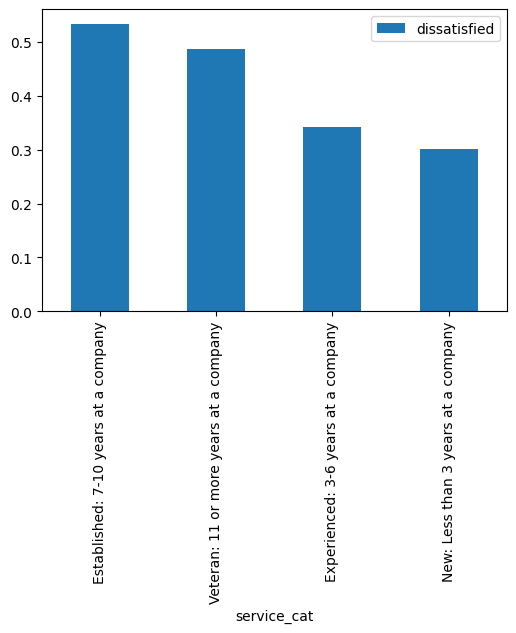

In [62]:
%matplotlib inline
tenureatcompanypivot = combined_updated.pivot_table(values='dissatisfied',index='service_cat')
tenureatcompanypivot = tenureatcompanypivot.sort_values(by='dissatisfied',ascending=False).plot(kind='bar')

From looking at the visual above, about half of all established employees who resigned, were dissatisffied with their jobs. At a high level, individuals who are employed longer are resigning more due to dissatisfaction. Younger employees who resign are less likely to be dissatisfied.